# Decision Trees

## Setup
### Imports

In [ ]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Decision trees

### Importing and observing the data
Using what you've learned in the previous practicals, answer the following questions:
1. Import the iris dataset directly from `scikit-learn`.
2. Convert it to a `pandas` Dataframe. Remember to add the `target` column. ***Note**: Keep the `target` column as digits, do not replace the digits with the names. This is because machine learning algorithms prefer working with numerical values.*
3. Using the relevant graphs and functions, realize an analysis of the dataset and its features.

In [ ]:
#1. Importng the dataset

iris = sklearn.datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [ ]:
#2. Checking the dataset

print(df.shape)
print(df["target"].value_counts())
print(df.describe())

(150, 5)
0.0    50
1.0    50
2.0    50
Name: target, dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


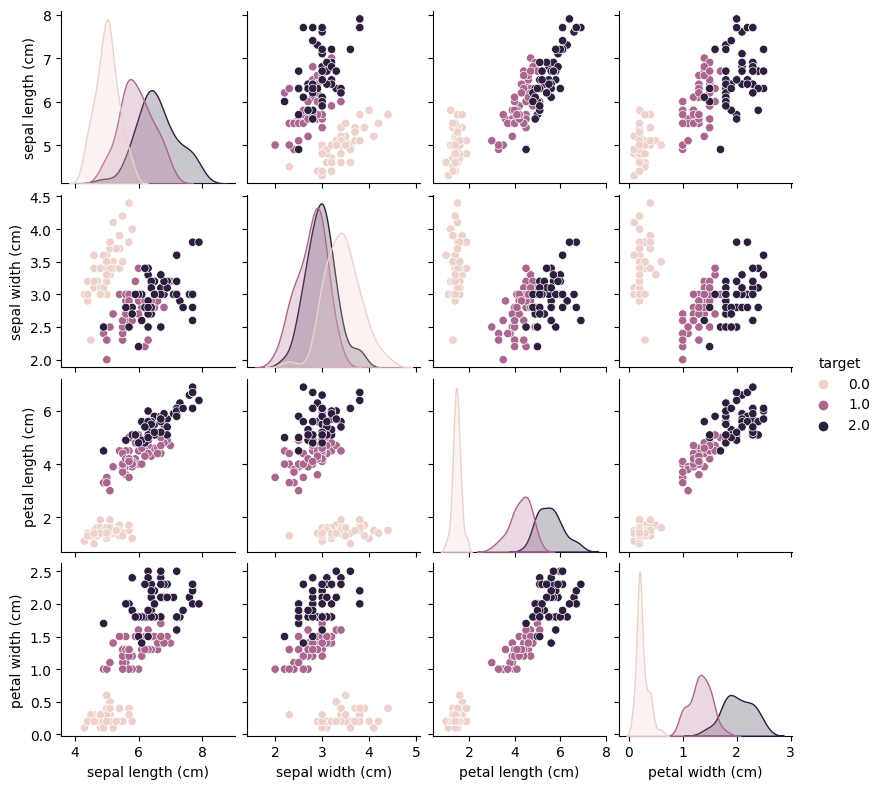

In [ ]:
#3.

sns.pairplot(df, hue='target', height=2)

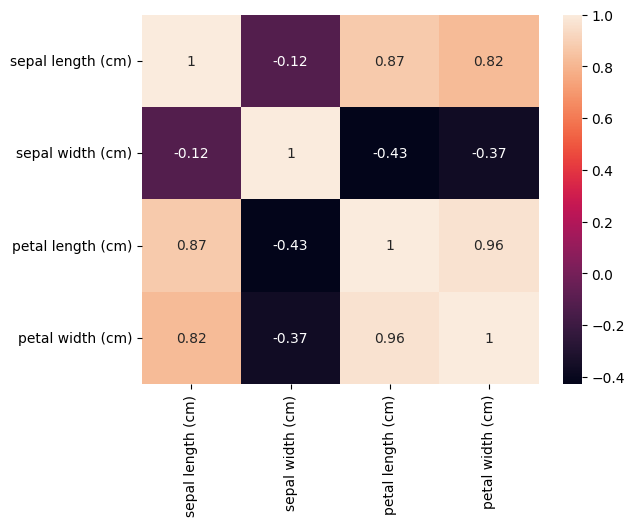

In [ ]:
sns.heatmap(df.drop(columns = "target").corr(method='pearson'),annot = True)
plt.show()

3. This dataset contains 4 measures of 150 iris flowers. <br> Each flower belongs to one of the three classes : setosa, versicolor and virginica (respectively target = 0.0, 1.0 and 2.0). <br>
The pairplot shows that setosa flowers can be easily distinguished from the other classes with most couples of features whereas distributions of versicolor and virginica overlap more or less depending on the features selected. <br> The correlation matrix show that 3 couple of different features are strongly correlated (ρ > 0.8).



### Preparing the data

1. Split the data into a training and a test set with an 80-20 proportion.
2. Display the number of examples in each set.

In [ ]:
# Spliting the data

X = df.drop(columns = "target")
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
# Displaying dimensions of each set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape, "\n")

# Checking the class balance
print(y_train.value_counts())

(120, 4)
(30, 4)
(120,)
(30,) 

0.0    40
2.0    40
1.0    40
Name: target, dtype: int64


### Training a decision tree

We will now train a decision tree on this dataset. In the following cell, import, instantiate and train a decision tree classifier.

In [ ]:
# Import the decision tree classifier from scikit-learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf = clf.fit(X_train, y_train)

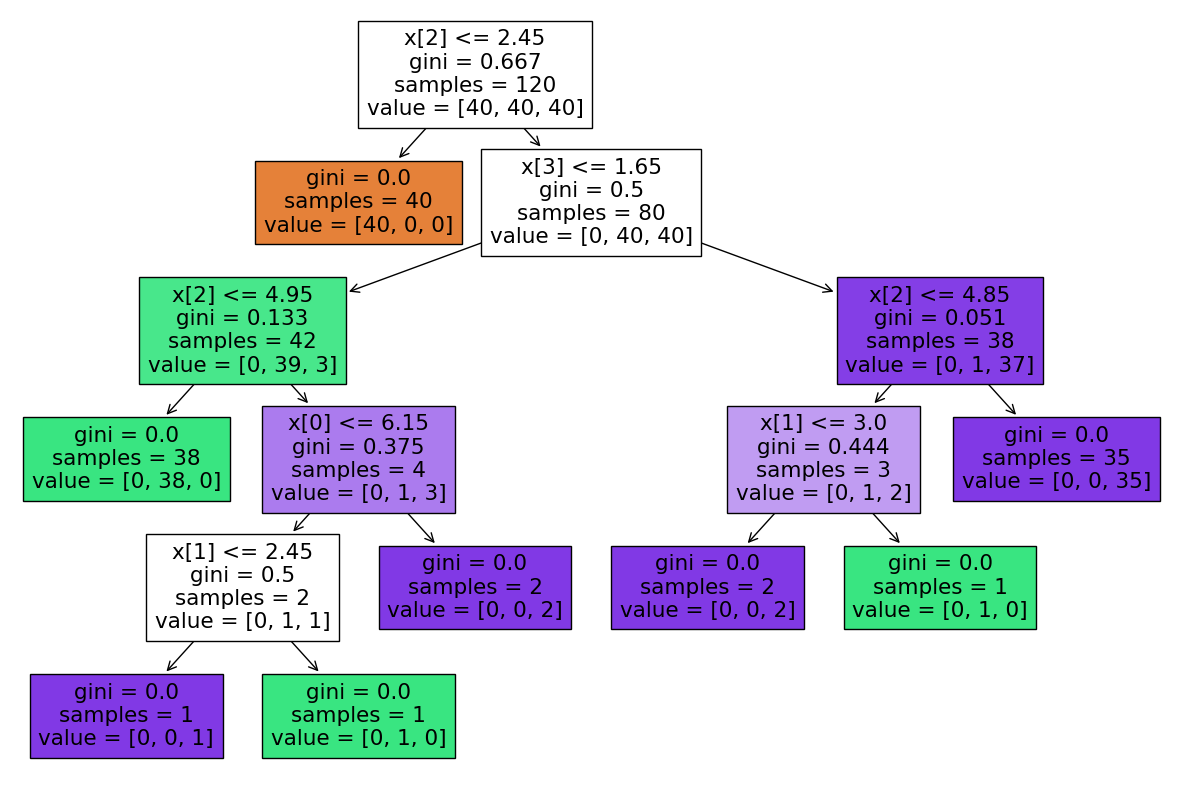

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,filled=True)

### Measuring the performance of the classifier

In the cells underneath, answer the following questions:
1. Measure and analyze the performance of the decision tree you have built.
2. Create and train two new decision trees: one using only sepal features, and one using only petal features.
3. Measure the performance of these new trees. Compare and comment.

In [ ]:
#1. Defining a function to display accuracy + confusion matrix

def evaluation(true_label, pred_label):
  classification_confusion_matrix = confusion_matrix(true_label, pred_label)
  label_names = pd.Series(['setosa', 'versicolor','virginica'])

  print(f"Accuracy : {accuracy_score(true_label, pred_label)}")
  return pd.DataFrame(classification_confusion_matrix,
                 columns='Predicted ' + label_names,
                 index='Is ' + label_names)\
        .div(classification_confusion_matrix.sum(axis=1), axis=0)

In [ ]:
# Evaluating the tree

y_pred_test = clf.predict(X_test)
evaluation(y_test,y_pred_test)

Accuracy : 0.9333333333333333


,Predicted setosa,Predicted versicolor,Predicted virginica
Is setosa,1.0,0.0,0.0
Is versicolor,0.0,0.9,0.1
Is virginica,0.0,0.1,0.9


1. With 93% accuracy, the decision tree has a satisfying performance. <br>

In [ ]:
#2. Creating new datasets using only sepal or only petal features

X_train_sep = X_train.drop(columns = ['petal length (cm)','petal width (cm)'])
X_test_sep = X_test.drop(columns = ['petal length (cm)','petal width (cm)'])

X_train_pet = X_train.drop(columns = ['sepal length (cm)','sepal width (cm)'])
X_test_pet = X_test.drop(columns = ['sepal length (cm)','sepal width (cm)'])

In [ ]:
# Building the trees using only sepal or only petal features

clf_sep = DecisionTreeClassifier(random_state=42)
clf_pet = DecisionTreeClassifier(random_state=42)

clf_sep = clf_sep.fit(X_train_sep, y_train)
clf_pet = clf_pet.fit(X_train_pet, y_train)

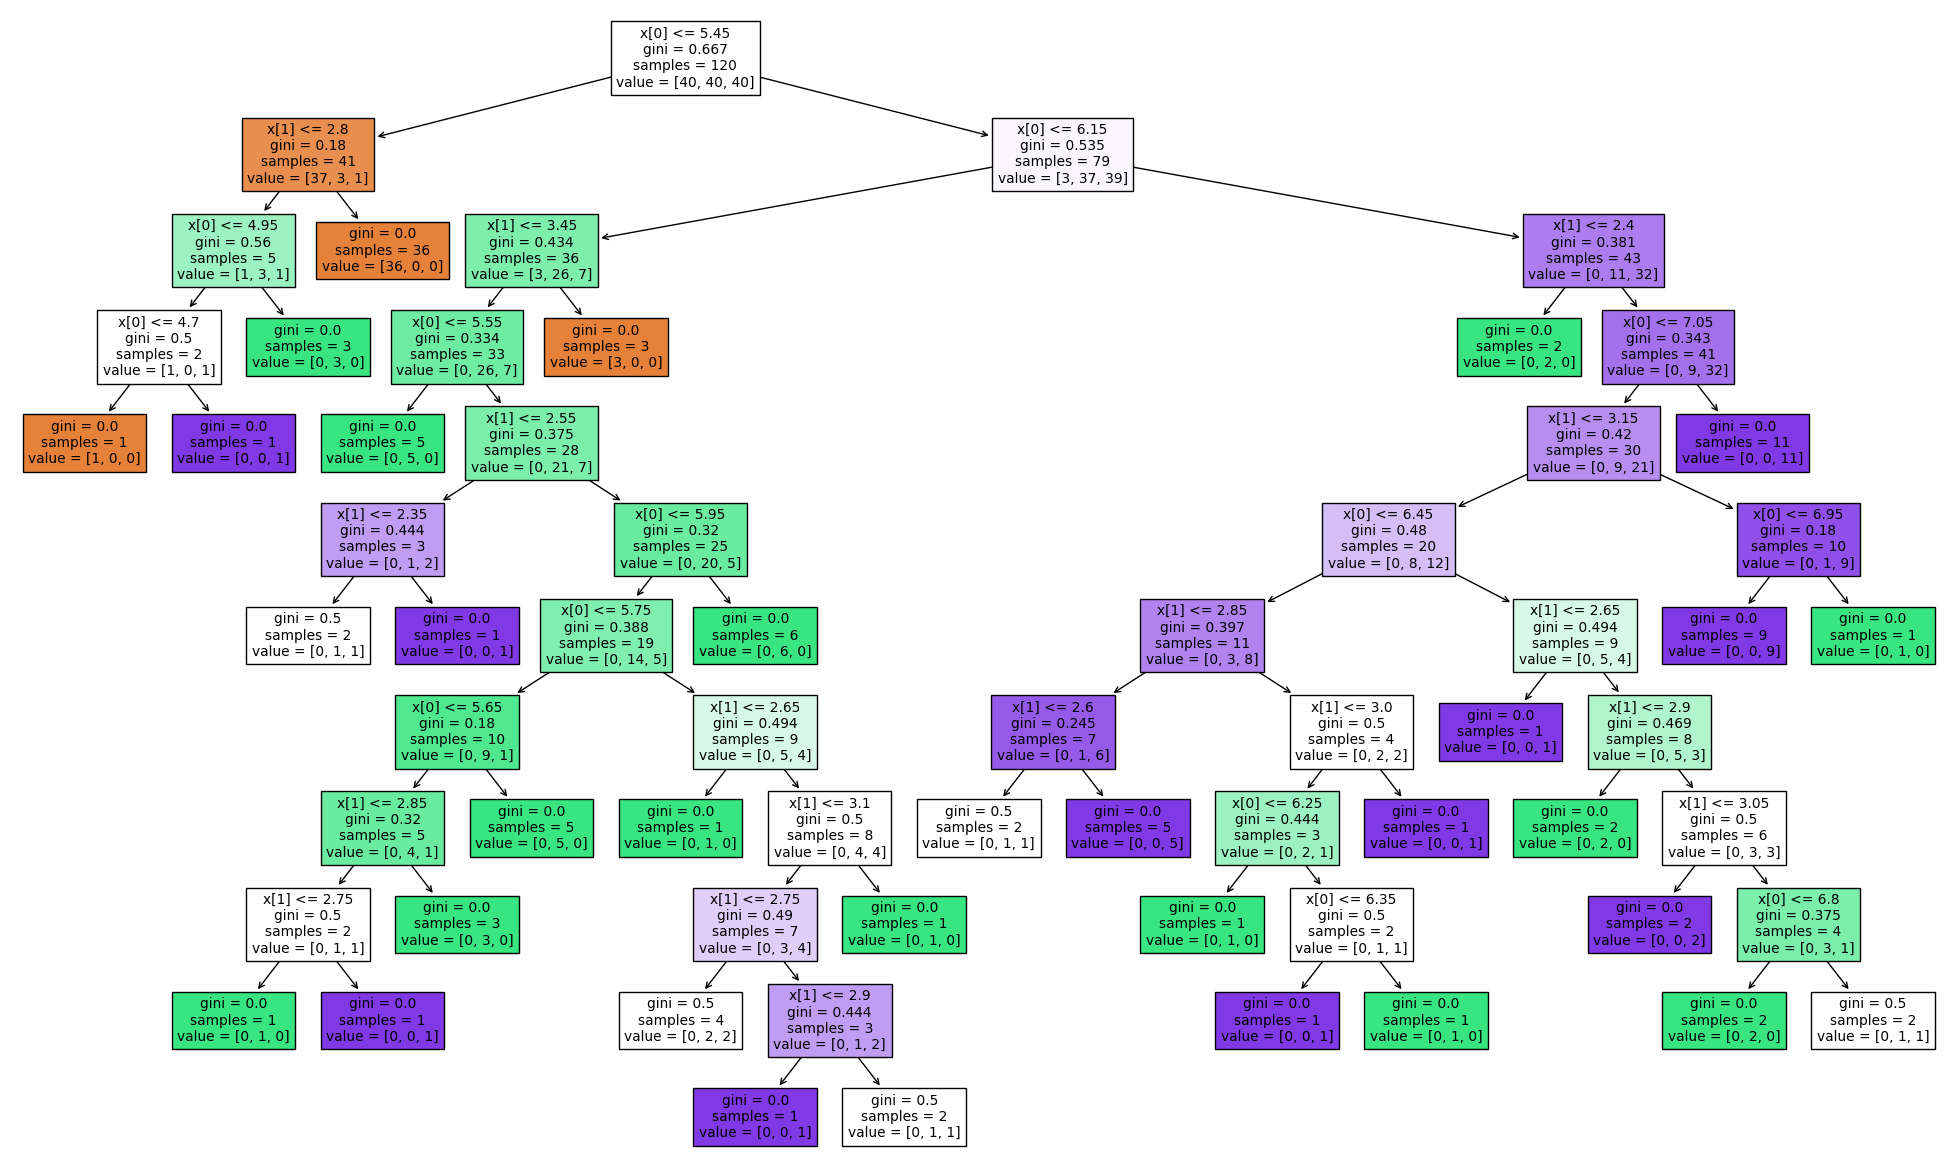

In [ ]:
# Showing the tree using only sepal features

fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(clf_sep,filled=True)

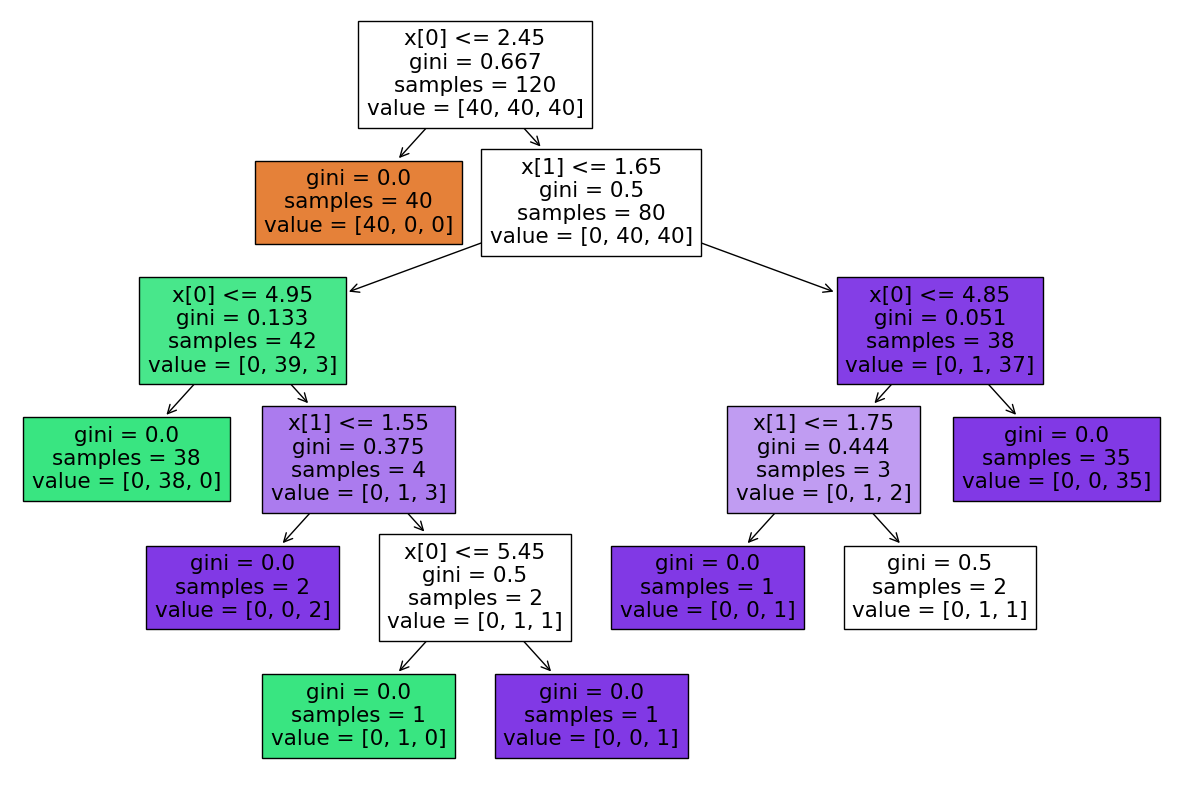

In [ ]:
# Showing the tree using only petal features

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_pet,filled=True)

In [ ]:
#3. Evaluating the tree using only sepal features

y_pred_test_sep = clf_sep.predict(X_test_sep)
evaluation(y_test,y_pred_test_sep)

Accuracy : 0.5666666666666667


,Predicted setosa,Predicted versicolor,Predicted virginica
Is setosa,1.0,0.0,0.0
Is versicolor,0.1,0.2,0.7
Is virginica,0.0,0.5,0.5


In [ ]:
# Evaluating the tree using only petal features

y_pred_test_pet = clf_pet.predict(X_test_pet)
evaluation(y_test,y_pred_test_pet)

Accuracy : 0.9333333333333333


,Predicted setosa,Predicted versicolor,Predicted virginica
Is setosa,1.0,0.0,0.0
Is versicolor,0.0,0.9,0.1
Is virginica,0.0,0.1,0.9


3. The tree using only petal features achieves the same accuracy score whereas the one using only sepal features only achieves a 57% accuracy score. It makes sense regarding the previous pairplots. The (petal length, petal width) couple of features is indeed way more discriminant than the (sepal length, sepal width) one. <br>